S&P 500 Is a Stock Market Index that measure the stock performance of 500 large companies listed on stock exchanges in the united states. 

- Analyzing whether stock prices of these tect companies
- Analyzing Daily Returns of each stock, Performing Multi Variate Analysis & how the are co-related
- Value at Risk Analysis 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')

##### The tech stocks we'll use for this analysis

In [2]:
path='individual_stocks_5yr'
company_list = ['AAPL_data.csv', 'GOOG_data.csv', 'MSFT_data.csv', 'AMZN_data.csv']

#blank dataframe
all_data = pd.DataFrame()

for file in company_list:
    current_df = pd.read_csv(path+"/"+file)
    all_data = pd.concat([all_data, current_df])
    
all_data.shape

(4752, 7)

### Analysis Dataset

In [3]:
all_data.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

- Date: Records the date or time when the stock market data is recorded.
- Open: Represents the opening price of a stock on a specific trading day.
- High: Indicates the highest price reached by the stock during the trading day.
- Low: Represents the lowest price reached by the stock during the trading day.
- Close: Records the closing price of the stock at the end of the trading day.
- Volume: Represents the total number of shares traded during a specific period, typically within a day.

In [4]:
all_data.describe()

open         high          low        close        volume
count  4752.000000  4752.000000  4752.000000  4752.000000  4.752000e+03
mean    344.075960   346.906095   340.992481   344.100091  2.465232e+07
std     329.660871   332.181676   326.876297   329.705792  2.956724e+07
min      27.350000    27.600000    27.230000    27.370000  7.932000e+03
25%      67.031000    67.668125    66.528900    66.836000  2.562696e+06
50%     153.740000   154.260000   152.685000   153.470000  1.796529e+07
75%     587.527500   592.625000   582.050000   587.092500  3.601633e+07
max    1477.390000  1498.000000  1450.040000  1450.890000  2.668336e+08

In [55]:
all_data.describe(include='object')

Name
count   4752
unique     4
top     AAPL
freq    1259

In [54]:
all_data.isnull().count()

date      4752
open      4752
high      4752
low       4752
close     4752
volume    4752
Name      4752
dtype: int64

In [5]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

**Change Tipe of Date From Object to Date**

In [6]:
all_data['date']=pd.to_datetime(all_data['date'])

In [7]:
all_data['date'][0]

0   2013-02-08
0   2014-03-27
0   2013-02-08
0   2013-02-08
Name: date, dtype: datetime64[ns]

In [8]:
all_data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [16]:
all_data['Name'].unique()

array(['AAPL', 'GOOG', 'MSFT', 'AMZN'], dtype=object)

# Analyzing whether stock prices of these tect companies

In [59]:
tech_list = all_data['Name'].unique()

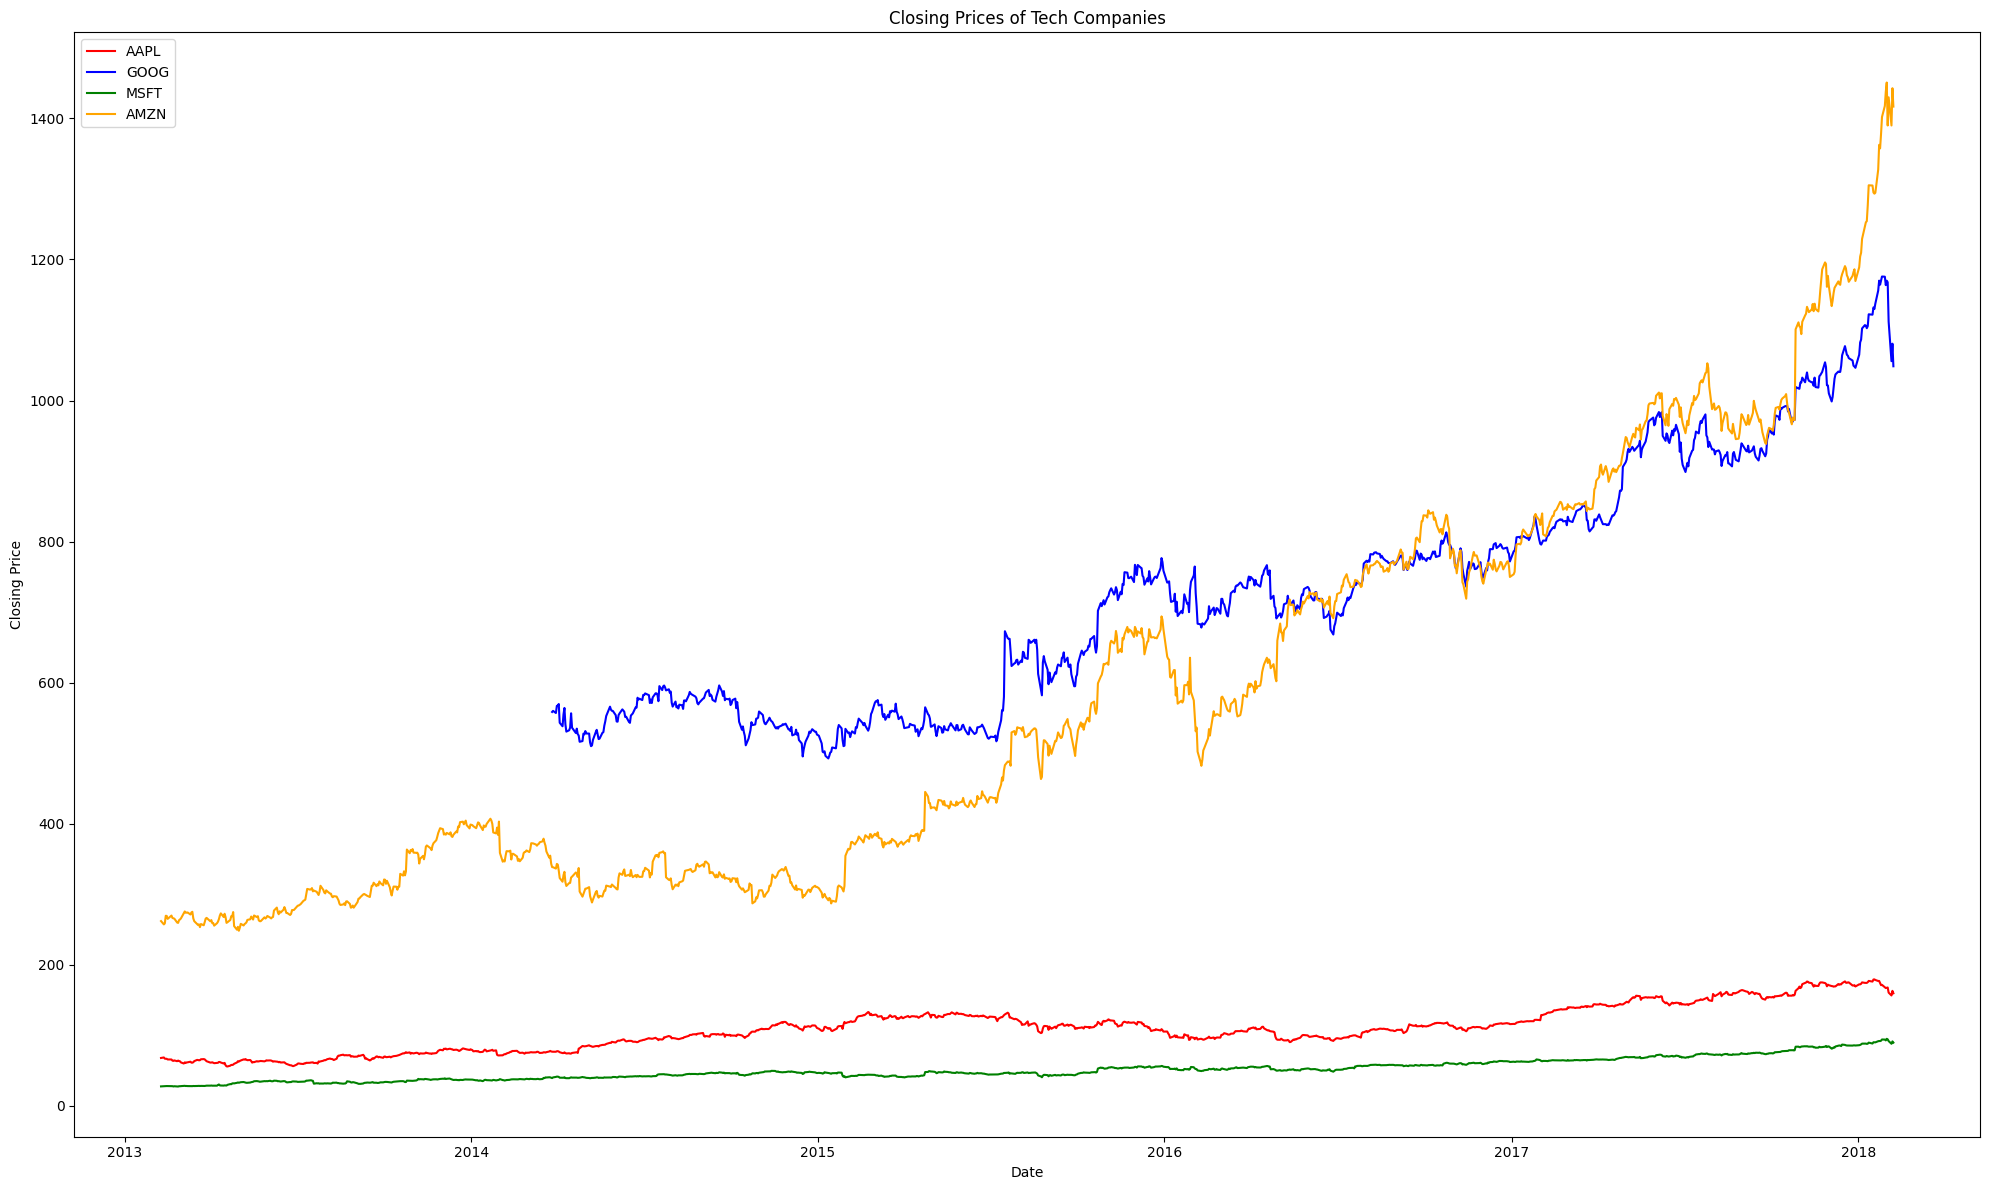

In [10]:
plt.figure(figsize=(20, 12))

color_mapping = {
    'AAPL': 'red',
    'GOOG': 'blue',
    'MSFT': 'green',
    'AMZN': 'orange'
}

for company in tech_list:
    df = all_data[all_data['Name'] == company]
    plt.plot(df['date'], df['close'], label=company, color=color_mapping.get(company, 'black'))

plt.title('Closing Prices of Tech Companies')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.tight_layout()
plt.show()

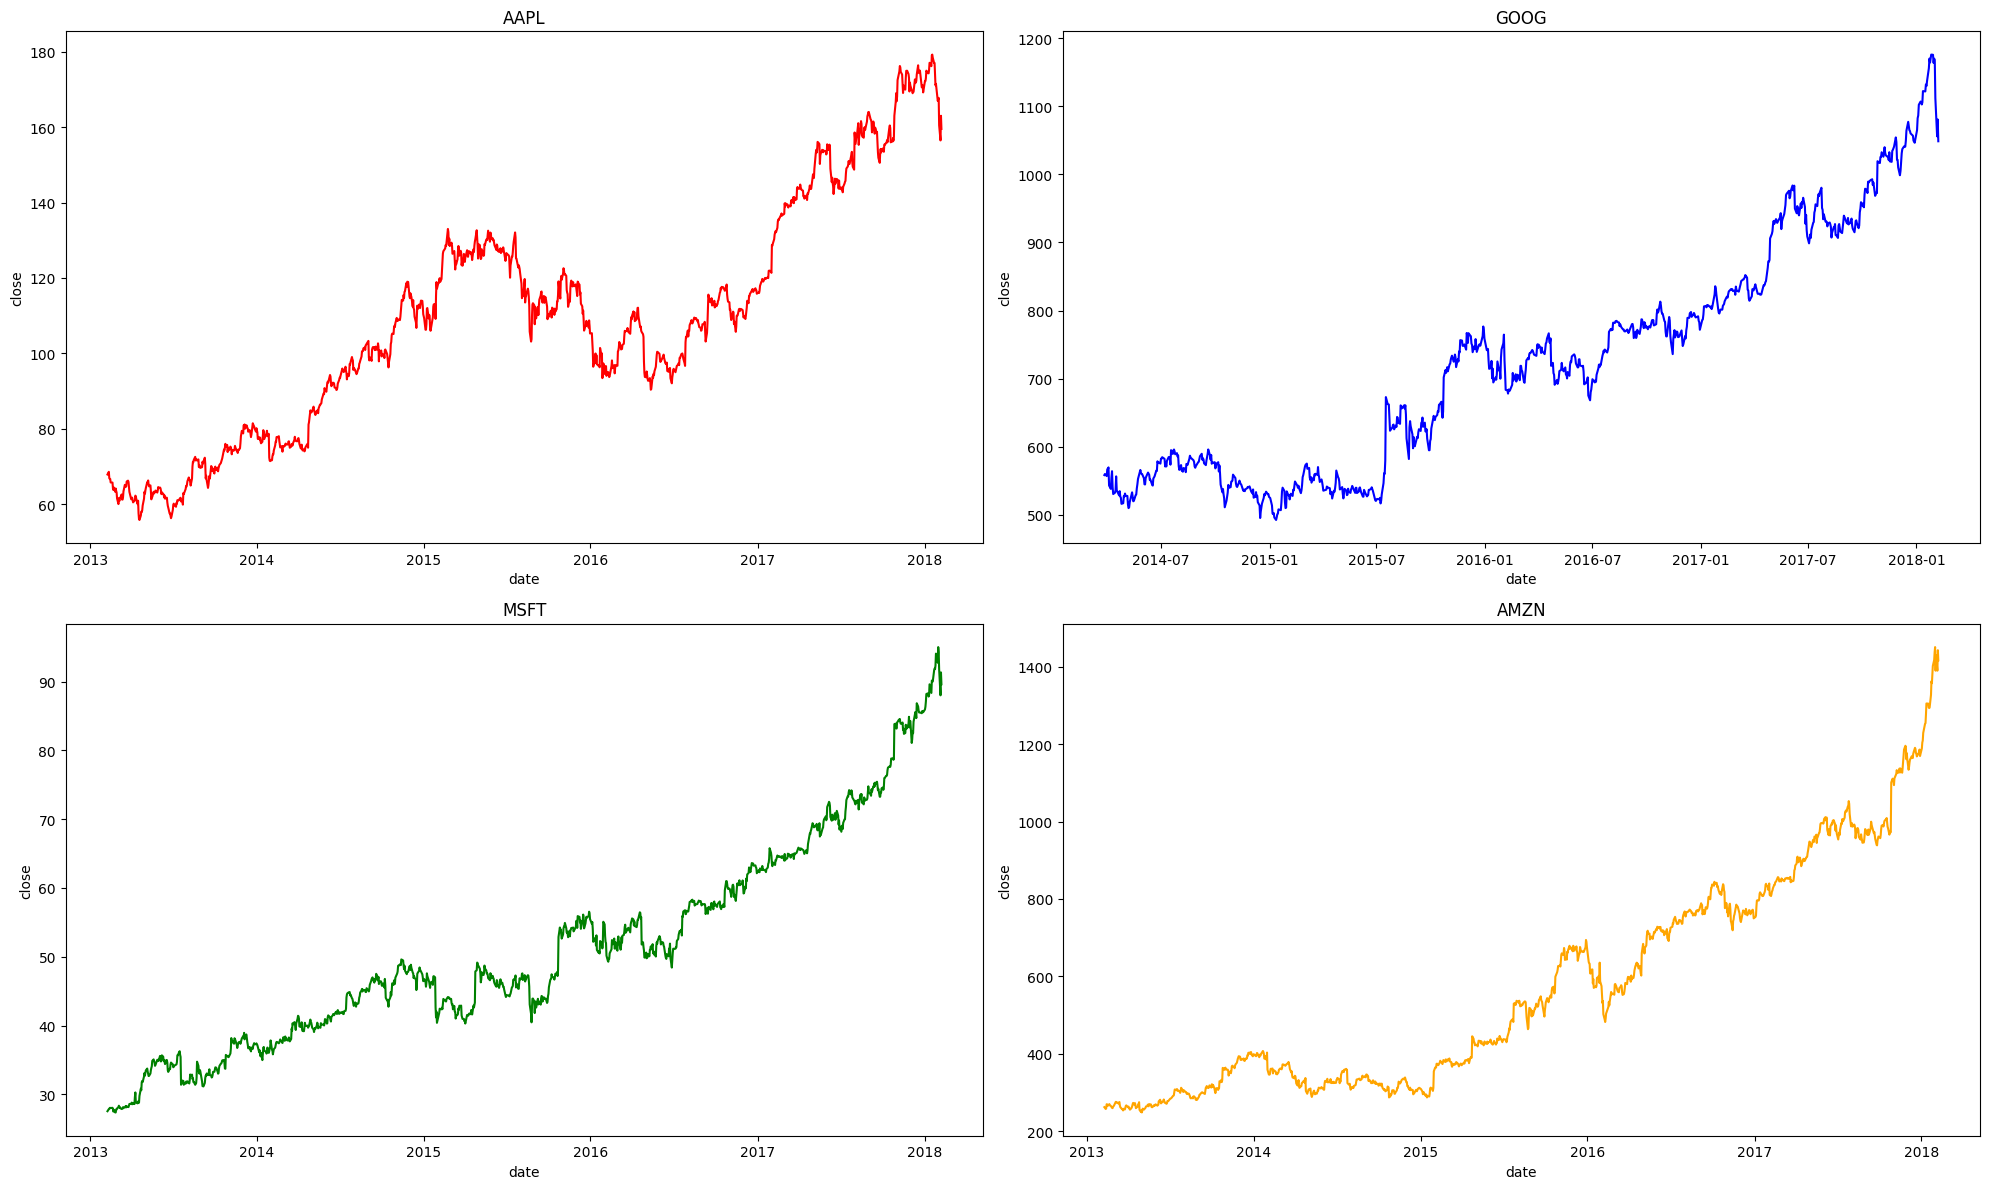

In [11]:
plt.figure(figsize=(20, 12))

for i,company in enumerate(tech_list, 1):
    plt.subplot(2, 2, i)
    df = all_data[all_data['Name'] == company]
    sns.lineplot(x='date', y='close', data=df, color=color_mapping.get(company, 'black'))
    plt.title(company)

plt.tight_layout()
plt.show()

- closing price of Apple stock so I can conclude are somewhere in the end of 2016, I have had going downfall
- Amazon somehow performs are exponential distribution, not exactly an exact exponential
- all stock had an upward trend.


##### let's analyse the total volume of stock being traded each day

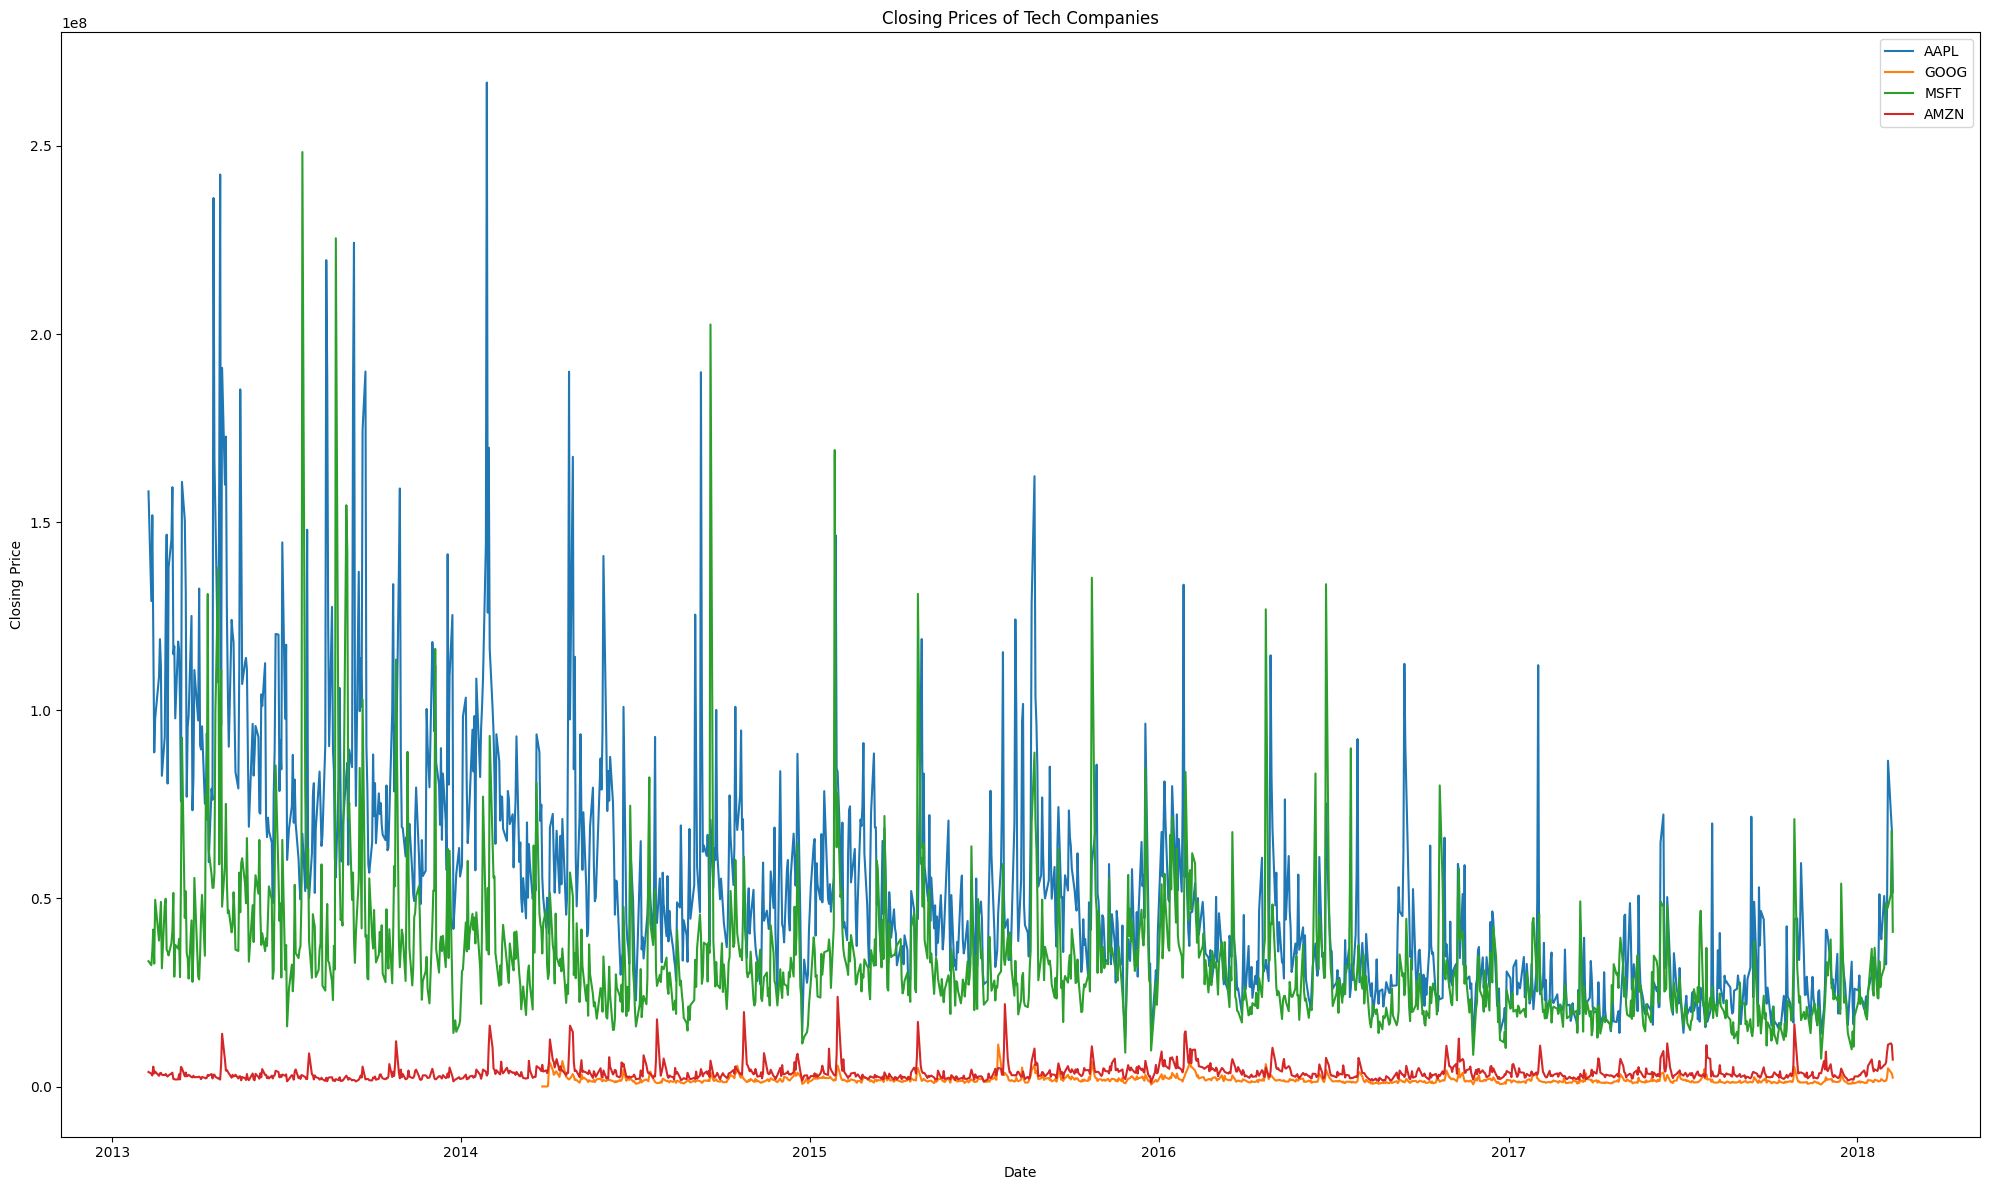

In [12]:
plt.figure(figsize=(20, 12))

for company in tech_list:
    df = all_data[all_data['Name'] == company]
    plt.plot(df['date'], df['volume'], label=company)

plt.title('Closing Prices of Tech Companies')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.tight_layout()
plt.show()

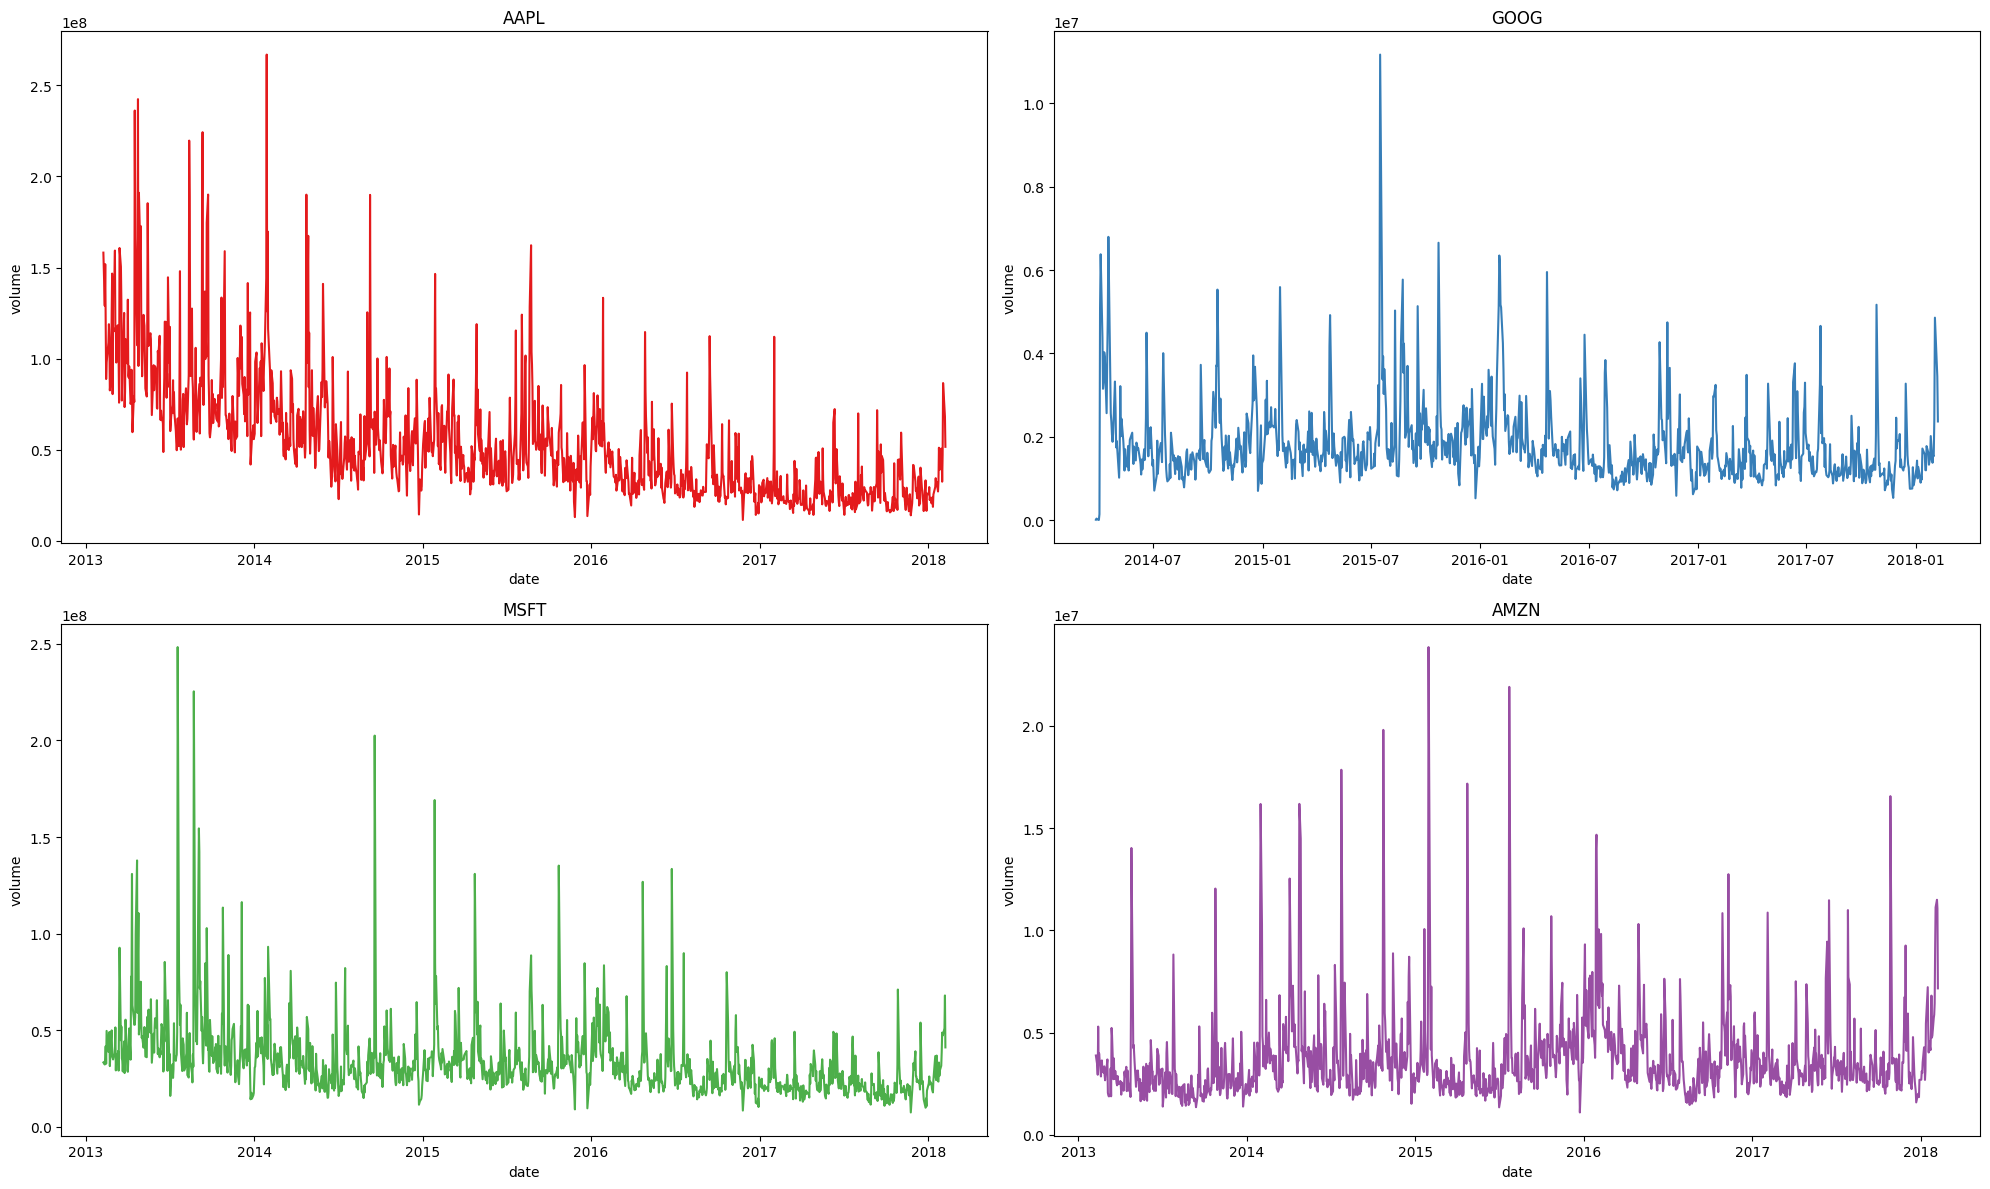

In [13]:
plt.figure(figsize=(20, 12))
colors = sns.color_palette('Set1', len(tech_list))
for i, company in enumerate(tech_list, 1):
    plt.subplot(2, 2, i)
    df = all_data[all_data['Name'] == company]
    sns.lineplot(x='date', y='volume', data=df, color=colors[i-1])
    plt.title(company)

plt.tight_layout()
plt.show()

In [14]:
import plotly.express as px


In [15]:
for company in (tech_list):
    df=all_data[all_data['Name']==company]
    fig = px.line(df, x="date", y="volume", title=company)
    fig.show()

# Analyse Daily Price Change/Return In Stock

##### Daily Stock Return Formula
    To calculate how much gained or lost per day for a stock, subtract the opening price from the closing price. Then, multiply the result by the number of shares you own in the company. 

In [17]:
df=pd.read_csv('individual_stocks_5yr/AAPL_data.csv')
df.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

##### percentage return

In [18]:
df['1day % return']=((df['close']-df['open'])/df['close'])*100
df.head()

date     open     high      low    close     volume  Name  \
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

   1day % return  
0       0.206325  
1       0.714688  
2      -2.481344  
3      -0.042869  
4       0.443624

In [19]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name',
       '1day % return'],
      dtype='object')

##### using plotly to visualise data

In [20]:
import plotly.express as px
fig = px.line(df, x="date", y="1day % return", title='')
fig.show()

- return on Agust 24, 2015. Showing return 8% this can happend cause by apple launched new product 
- return on Agust 25, 2015. showing return -7% this can happend cause by goverment policies

##### using matplotlib for visualisation

<AxesSubplot: >

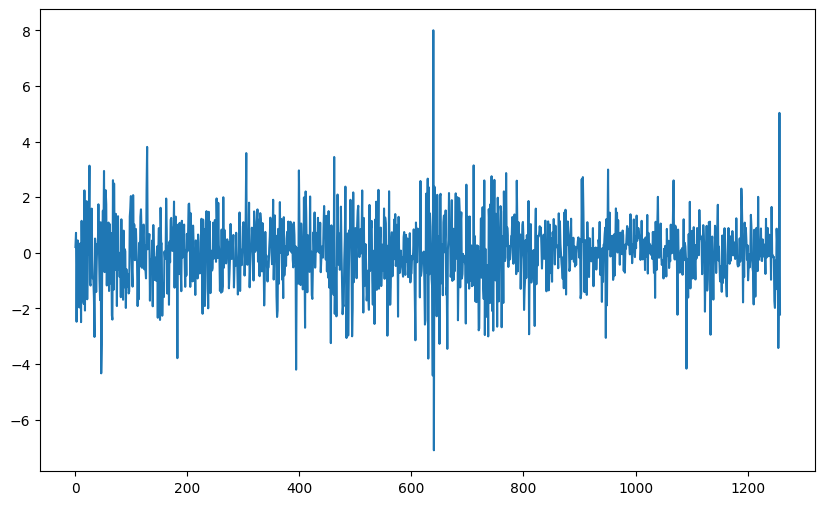

In [21]:
plt.figure(figsize=(10,6))
df['1day % return'].plot()

#### Return between some interval date

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 [Text(-1.0, 0, '2015-08-28'),
  Text(0.0, 0, '2015-08-21'),
  Text(1.0, 0, '2015-08-24'),
  Text(2.0, 0, '2015-08-25'),
  Text(3.0, 0, '2015-08-26'),
  Text(4.0, 0, '2015-08-27'),
  Text(5.0, 0, '2015-08-28'),
  Text(6.0, 0, '')])

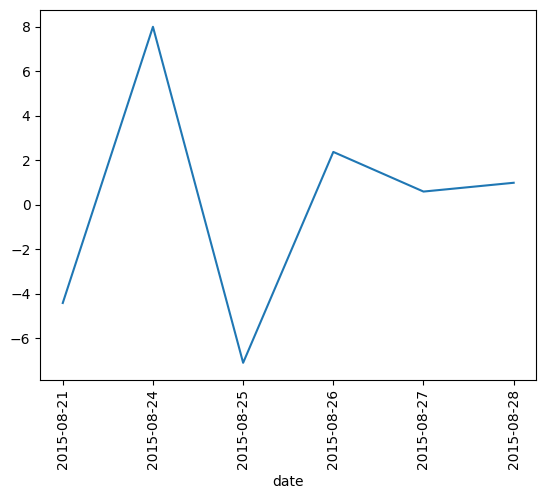

In [58]:
df.set_index('date')['2015-08-21':'2015-08-28']['1day % return'].plot()
plt.xticks(rotation='vertical')

#### Analyse monthly mean of close column

In [23]:
df2=df.copy()

In [24]:
df2['date']=pd.to_datetime(df2['date'])

In [25]:
df2.set_index('date',inplace=True)

In [26]:
df2.head()

open     high      low    close     volume  Name  1day % return
date                                                                          
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL       0.206325
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL       0.714688
2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL      -2.481344
2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL      -0.042869
2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL       0.443624

##### In Month

<AxesSubplot: xlabel='date'>

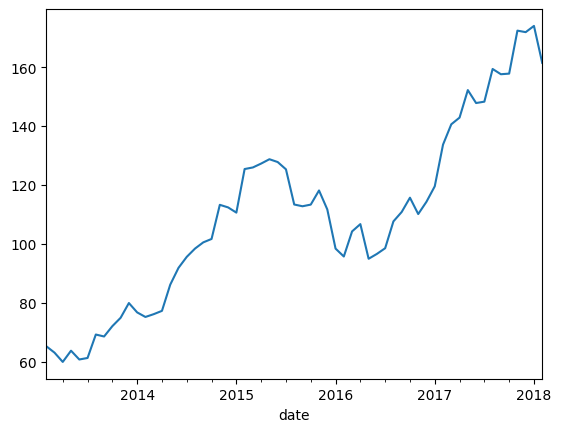

In [27]:
df2['close'].resample('M').mean().plot()

##### In Year

<AxesSubplot: xlabel='date'>

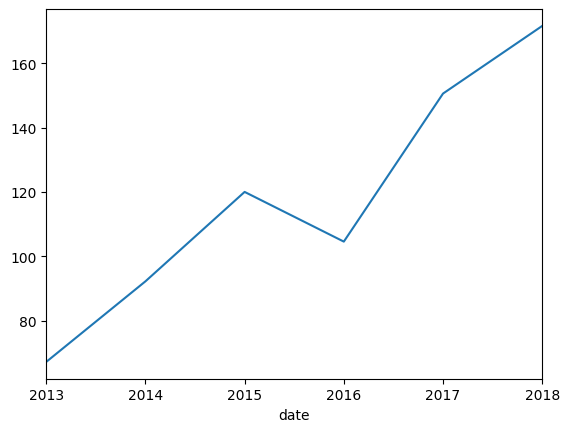

In [28]:
df2['close'].resample('Y').mean().plot()

##### Checking if the Stock prices of these tech companies(Amazon,Apple,Google,Microsoft) are correlated

In [29]:
df2.head()

open     high      low    close     volume  Name  1day % return
date                                                                          
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL       0.206325
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL       0.714688
2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL      -2.481344
2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL      -0.042869
2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL       0.443624

##### reading data of tech companies

In [30]:
aapl=pd.read_csv('individual_stocks_5yr/AAPL_data.csv')
aapl.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [31]:
goog=pd.read_csv('individual_stocks_5yr/GOOG_data.csv')
goog.head()

date     open    high     low   close  volume  Name
0  2014-03-27  568.000  568.00  552.92  558.46   13052  GOOG
1  2014-03-28  561.200  566.43  558.67  559.99   41003  GOOG
2  2014-03-31  566.890  567.00  556.93  556.97   10772  GOOG
3  2014-04-01  558.710  568.45  558.71  567.16    7932  GOOG
4  2014-04-02  565.106  604.83  562.19  567.00  146697  GOOG

In [32]:
amzn=pd.read_csv('individual_stocks_5yr/AMZN_data.csv')
amzn.head()

date    open    high      low   close   volume  Name
0  2013-02-08  261.40  265.25  260.555  261.95  3879078  AMZN
1  2013-02-11  263.20  263.25  256.600  257.21  3403403  AMZN
2  2013-02-12  259.19  260.16  257.000  258.70  2938660  AMZN
3  2013-02-13  261.53  269.96  260.300  269.47  5292996  AMZN
4  2013-02-14  267.37  270.65  265.400  269.24  3462780  AMZN

In [33]:
msft=pd.read_csv('individual_stocks_5yr/MSFT_data.csv')
msft.head()

date   open   high    low  close    volume  Name
0  2013-02-08  27.35  27.71  27.31  27.55  33318306  MSFT
1  2013-02-11  27.65  27.92  27.50  27.86  32247549  MSFT
2  2013-02-12  27.88  28.00  27.75  27.88  35990829  MSFT
3  2013-02-13  27.93  28.11  27.88  28.03  41715530  MSFT
4  2013-02-14  27.92  28.06  27.87  28.04  32663174  MSFT

In [34]:
### create a blank dataframe
close=pd.DataFrame()

In [35]:
close['aapl']=aapl['close']
close['goog']=goog['close']
close['amzn']=amzn['close']
close['msft']=msft['close']

In [36]:
close.head()

aapl    goog    amzn   msft
0  67.8542  558.46  261.95  27.55
1  68.5614  559.99  257.21  27.86
2  66.8428  556.97  258.70  27.88
3  66.7156  567.16  269.47  28.03
4  66.6556  567.00  269.24  28.04

#### Multi-variate Analysis

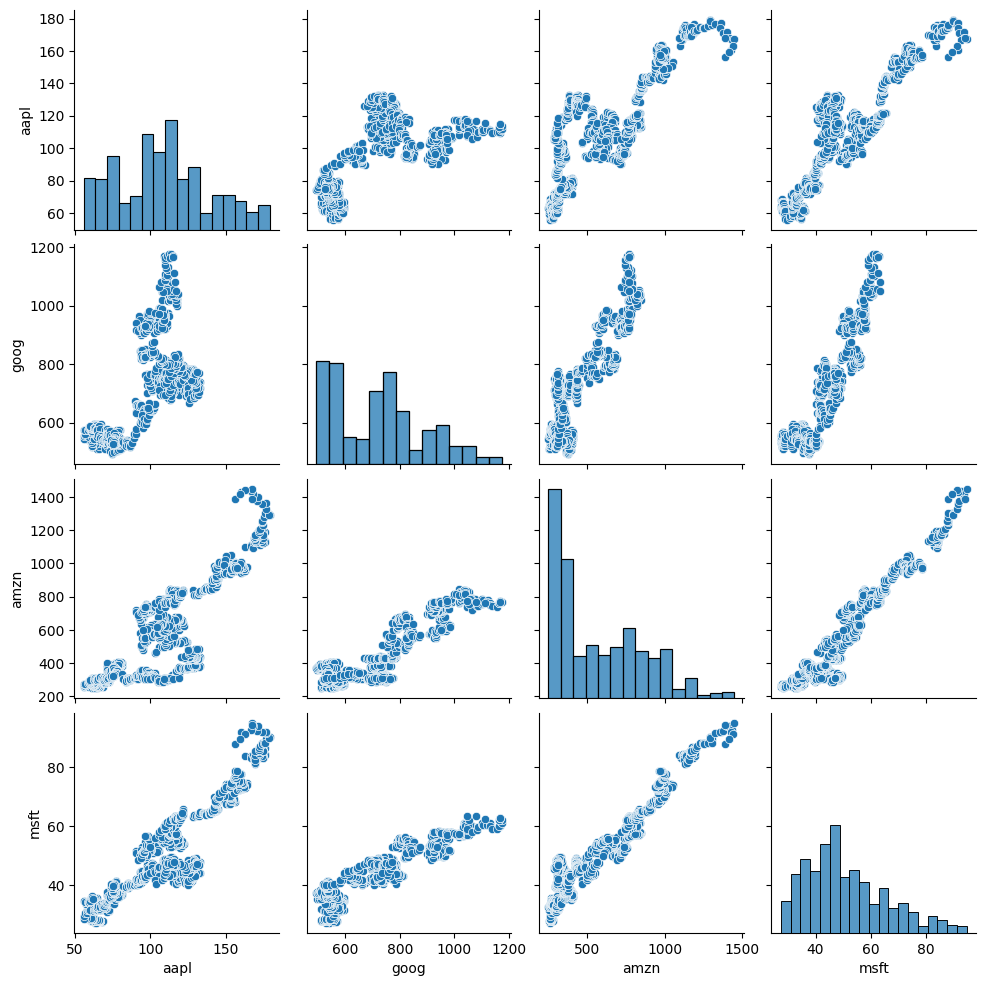

In [37]:
sns.pairplot(data=close)

- Amazon and Microsoft  is a close linear relationship between the stock prices of Amazon and Microsoft. If the price of Amazon's stock increases or the closing price of Amazon rises, it is expected that the closing price of Microsoft's stock will also increase. This indicates a positive correlation between the stock performance of the two companies. However, it is important to note that this relationship is not absolute and can be influenced by other factors affecting the stock market.

##### co-relation plot for stock prices 

<AxesSubplot: >

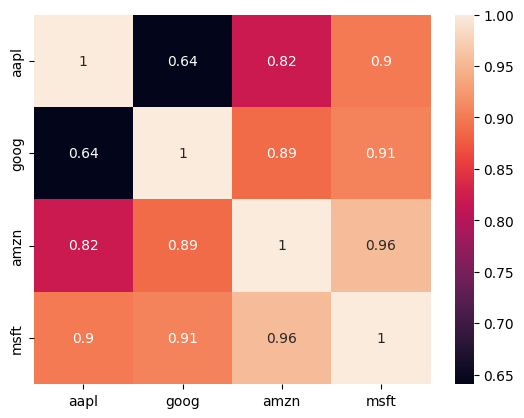

In [38]:
sns.heatmap(close.corr(),annot=True)

###### Closing price of Google and Microsoft are well correlated
       and Closing price of Amazon and Microsoft have a co-relation of 0.96

## Analyse Daily return of each stock & how they are co-related

In [39]:
data=pd.DataFrame()

In [40]:
aapl.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [41]:
data['appl_change']=((aapl['close']-aapl['open'])/aapl['close'])*100
data['goog_change']=((goog['close']-goog['open'])/goog['close'])*100
data['amzn_change']=((amzn['close']-amzn['open'])/amzn['close'])*100
data['msft_change']=((msft['close']-msft['open'])/msft['close'])*100

In [42]:
data.head()

appl_change  goog_change  amzn_change  msft_change
0     0.206325    -1.708269     0.209964     0.725953
1     0.714688    -0.216075    -2.328836     0.753769
2    -2.481344    -1.781065    -0.189409     0.000000
3    -0.042869     1.489879     2.946525     0.356761
4     0.443624     0.334039     0.694548     0.427960

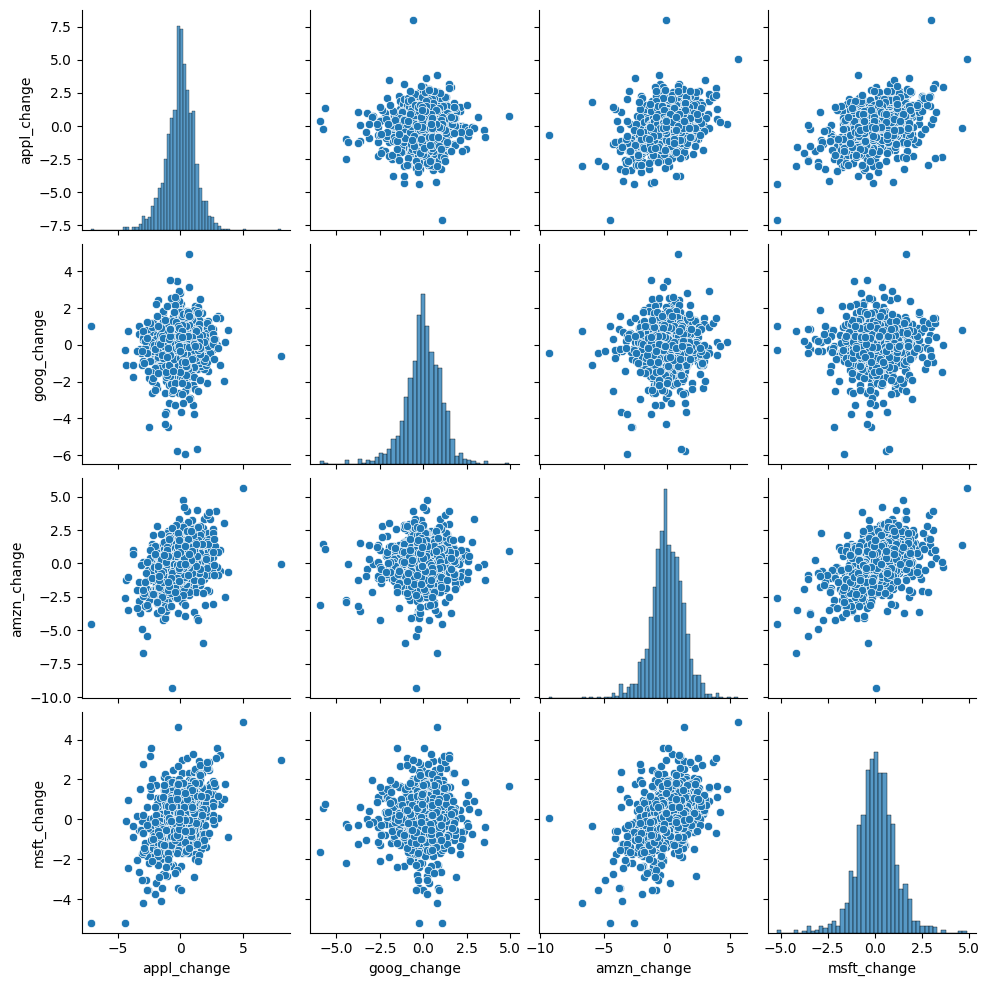

In [43]:
sns.pairplot(data=data)

##### Correlation plot for daily returns

<AxesSubplot: >

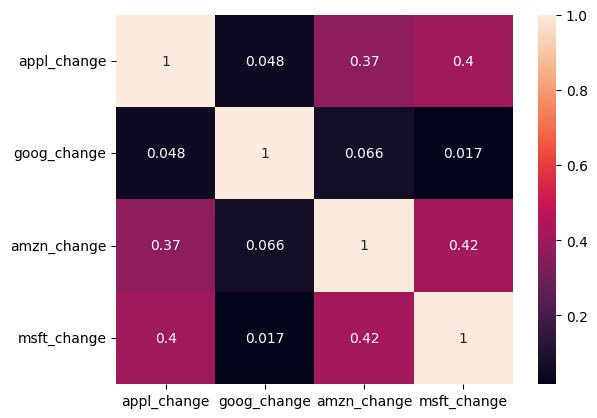

In [44]:
sns.heatmap(data.corr(),annot=True)

##### We can see that Amazon and microsoft have good correlation on daily returns

In [45]:
data.head()

appl_change  goog_change  amzn_change  msft_change
0     0.206325    -1.708269     0.209964     0.725953
1     0.714688    -0.216075    -2.328836     0.753769
2    -2.481344    -1.781065    -0.189409     0.000000
3    -0.042869     1.489879     2.946525     0.356761
4     0.443624     0.334039     0.694548     0.427960

In [46]:
data.columns

Index(['appl_change', 'goog_change', 'amzn_change', 'msft_change'], dtype='object')

In [47]:
type(data)

pandas.core.frame.DataFrame

# Value at Risk Analysis for Apple

In [48]:
import seaborn as sns

<AxesSubplot: xlabel='appl_change', ylabel='Density'>

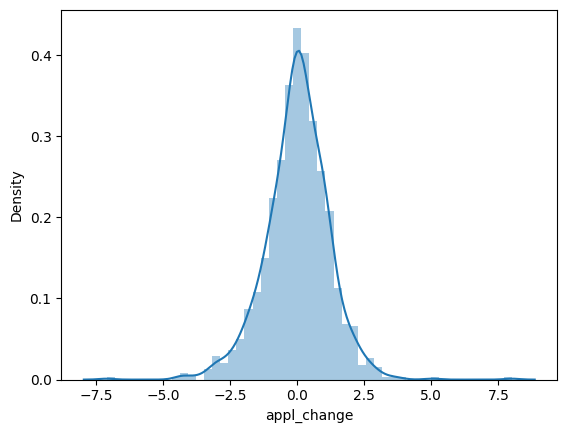

In [49]:
sns.distplot(data['appl_change'])

##### it somehow follows a normal distribution

In [50]:
data['appl_change'].std()

1.1871377131421237

In [51]:
data['appl_change'].quantile(0.1)

-1.4246644227944307

##### 1.4246644227944307 means that 90% of the times the worst daily Loss will not exceed 1.42

In [60]:
data['appl_change'].describe().T

count    1259.000000
mean       -0.000215
std         1.187138
min        -7.104299
25%        -0.658021
50%         0.042230
75%         0.715427
max         8.000388
Name: appl_change, dtype: float64